# Regressão Logística 1x5

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train1x5 = pd.read_csv('../dataset/train1x5.csv')
test1x5 = pd.read_csv('../dataset/test1x5.csv')

### vetores

In [4]:
x_train = [(x,y) for x, y in zip(train1x5['intensidade'], train1x5['simetria'])]
y_train = train1x5['label']

x_test = [(x,y) for x, y in zip(test1x5['intensidade'], test1x5['simetria'])]
y_test = test1x5['label']

#### verificações

In [5]:
print('x_train:', len(x_train), 'y_train:', len(y_train))

x_train: 1184 y_train: 1184


In [6]:
#verificando simetria e intensidade

print('treino = 1')
print(train1x5[train1x5['label'] == 1].mean())

print('treino = 5')
print(train1x5[train1x5['label'] == 5].mean())



print('teste = 1')
print(test1x5[test1x5['label'] == 1].mean())

print('teste = 5')
print(test1x5[test1x5['label'] == 5].mean())


treino = 1
label           1.000000
intensidade    55.718266
simetria       75.495188
dtype: float64
treino = 5
label            5.000000
intensidade     98.983905
simetria       126.772835
dtype: float64
teste = 1
label           1.000000
intensidade    55.740075
simetria       75.057400
dtype: float64
teste = 5
label            5.000000
intensidade     98.698592
simetria       126.716205
dtype: float64


# Regressão Logistica:

## Equations :

$ W = \begin{bmatrix}w_1 \\ w_2 \\ . \\ . \\ w_n \end{bmatrix}_{ n x 1}$ ......... initialize with zeros

$ B = single$  $weight/parameter $

$ X = \begin{bmatrix}. & . & .  \\ .  & . & .  \\ . & . & .  \\ . & . & .  \\ \end{bmatrix}_{n x m}$

$ Y = \begin{bmatrix}. & . & . & . & . \end{bmatrix}_{1 x m}$


$\sigma = \frac{1}{(1 + e^{-x})}  $   ......... (sigmoid function)


A = $\sigma ( W^T*X + b ) $    ........ (probabilistic predictions of shape (1 x m ) )

<img src = "sigmoid.png" width = 400px>


## Cost function :

$ cost = - \frac{1}{m} \sum_{i=1}^m [ y*log(a) + (1 - y)*log(1 - a) ] $

## Gradient Descent 

$dW = \frac{\partial COST }{\partial W} = ( A - Y )*X^T $ ...... shape (1 x n) 

$dB = \frac{\partial COST }{\partial B} = ( A - Y ) $

$W = W - \alpha * dW^T $

$B = B - \alpha * dB $


<img src = "gradient-descent.png" width = 300px>

<Axes: xlabel='label', ylabel='intensidade'>

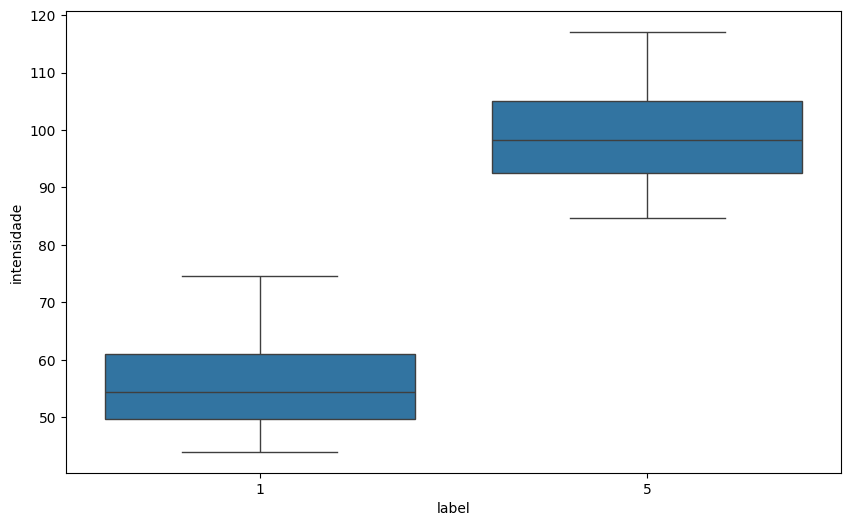

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='intensidade', data=train1x5)

<Axes: xlabel='label', ylabel='simetria'>

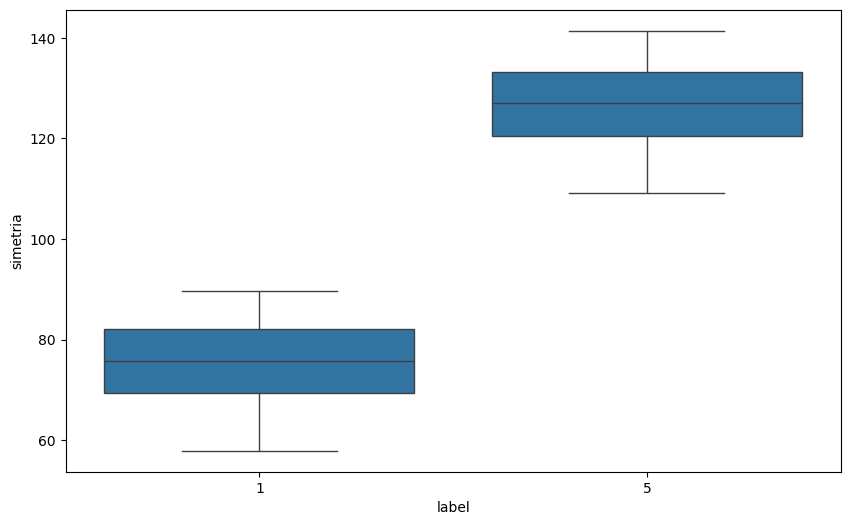

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='simetria', data=train1x5)

### vizualização gráfica

<Axes: xlabel='simetria', ylabel='label'>

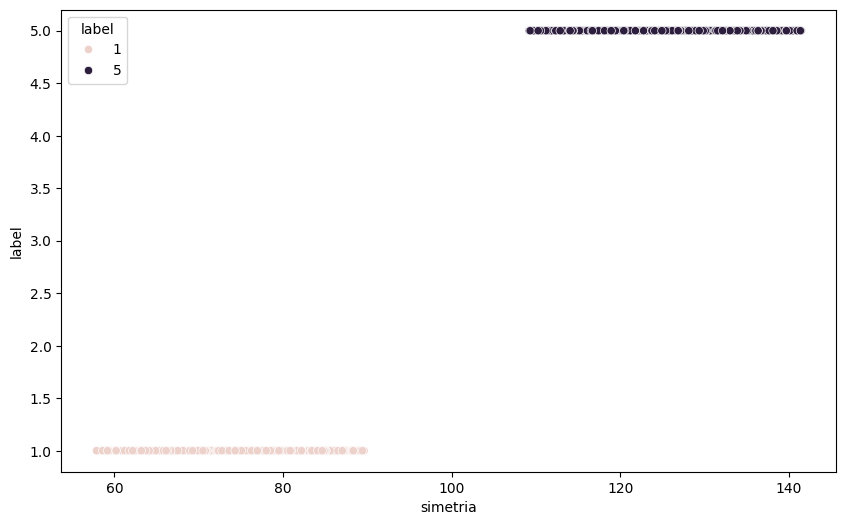

In [9]:
plt.figure(figsize=(10, 6))

sns.scatterplot(x='simetria', y='label', hue='label', data=train1x5)

Função sigmoide:

$$
y(s) = \frac{1}{1 + e^{-y_s}} = \frac{e^{y_s}}{1+e^{y_s}}
$$

Log-verossimilhança / Log Loss / Entropia Cruzada Binária (custo):

$$
J(θ) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_θ(x^{(i)})) \right]
$$

Gradiente:

$$
∇J(θ) = \frac{1}{m} X^T \left(h_θ(X) - y\right)
$$

Onde:

- X é uma matriz de características;

- y é um vetor de rótulos; 

- learning_rate é a taxa de aprendizado (padrão é 0.01);

- num_iterations é o número de iterações do algoritmo de otimização (padrão é 1000);

- m é o número de exemplos de treinamento;

- n é o número de características da matriz X;

Obs.: theta é inicializado como um vetor de zeros com tamanho n;

- Em cada iteração, o código calcula o produto interno entre X e theta usando np.dot(X, theta), e em seguida, aplica a função sigmoidal sigmoid(z) para obter as probabilidades preditas h;

- No final do loop, a função retorna os parâmetros theta e o histórico de custo cost_history.

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583



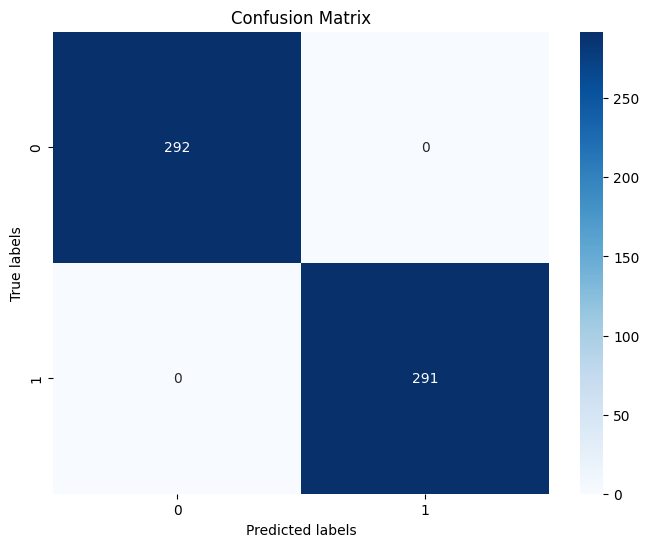

In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def logistic_regression(X_train, y_train, X_test, y_test):
    # Create an instance of Logistic Regression
    model = LogisticRegression()

    # Fit the model to the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Generate a classification report
    report = classification_report(y_test, y_pred)

    # Return the accuracy, confusion matrix, and classification report
    return accuracy, cm, report

accuracy, cm, report = logistic_regression(x_train, y_train, x_test, y_test)

print('Accuracy:', accuracy)
print('Classification Report:')
print(report)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


# Função Manual

A rl é um modelo linear de *classificação*

Função sigmoide:

$$
y(s) = \frac{1}{1 + e^{-y_s}} = \frac{e^{y_s}}{1+e^{y_s}}
$$

Log-verossimilhança / Log Loss / Entropia Cruzada Binária (custo):

$$
J(θ) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(h_θ(x^{(i)})) + (1 - y^{(i)}) \log(1 - h_θ(x^{(i)})) \right]
$$

Gradiente:

$$
∇J(θ) = \frac{1}{m} X^T \left(h_θ(X) - y\right)
$$


onde:

$y_s = b_{0} + b_{1} * x$


e = Euler = 2,71....

obs1.: Para tipos binarios, segue-se a logica da regressão linear 

obs2.: A resposta da regressão logistica é binaria


In [11]:
import numpy as np

def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions-y)

            self.weights = self.weights - self.lr*dw
            self.bias = self.bias - self.lr*db


    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        class_pred = [0 if y<=0.5 else 1 for y in y_pred]
        return class_pred
    

model = LogisticRegression(lr=0.01, n_iters=1000)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(y_pred)


AttributeError: 'list' object has no attribute 'shape'

In [ ]:
def sigmoide(z):
    return 1 / (1 + np.exp(-z))

def parametros_iniciais(dim):
    w = np.zeros((dim, 1))
    b = 0
    return w, b

def custo(a, y):
    m = y.shape[1]

    cost =  (-1 / m) * np.sum(y * np.log(a) + (1 - y) * np.log(1 - a))

    return cost

def propagacao(w, b, X, Y):
    m = X.shape[1]

    # Forward pass
    Z = np.dot(w.T, X) + b
    A = sigmoide(Z)

    # Compute cost
    cost = custo(A, Y)

    # Backward pass
    dZ = A - Y
    dw = (1 / m) * np.dot(X, dZ.T)
    db = (1 / m) * np.sum(dZ)

    grads = {'dw': dw, 'db': db}

    return grads, cost

def att_parametros(w, b, grads, learning_rate=0.01):
    
    w -= learning_rate * grads["dW"]
    b -= learning_rate * grads["db"]

    return w, b

def regressao_logistica(x, y, num_iteracoes=100, learning_rate=0.01):
    dim = x.shape[0]
    w, b = parametros_iniciais(dim)

    for i in range(num_iteracoes):
        grads, cost = propagacao(w, b, x, y)

        w, b = att_parametros(w, b, grads, learning_rate)

        if i % 100 == 0:
            print(f'Cost after iteration {i}: {cost}')

    return w, b

def predict_(W, b, X):
    Z = np.dot(W.T, X) + b
    A = sigmoide(Z)
    predictions = (A > 0.5).astype(int)
    return predictions

In [ ]:
# Treinar o modelo
W, b = regressao_logistica(x_train.T, y_train)

# Fazer previsões
predictions = predict_(W, b, x_train.T)
print("Predictions:", predictions)

IndexError: tuple index out of range

# Função pronta

In [12]:
from sklearn.linear_model import LogisticRegression

## x_train

In [13]:
funcao_logistica = LogisticRegression()

In [14]:
funcao_logistica.fit(x_train, y_train)

LogisticRegression()

In [15]:
previsao = funcao_logistica.predict(x_test)

In [16]:
previsao

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5,

In [17]:
acerto = 0
for i in range(len(previsao)):
    if previsao[i] == y_test[i]:
        acerto += 1

print('acurácia:', acerto/len(previsao)*100)

acurácia: 100.0


In [18]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, previsao)

array([[292,   0],
       [  0, 291]])

In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, previsao))

acertos_0 = 292
tentativas_0 = 292
print('Recall daria no mesmo: ', (acertos_0/tentativas_0))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       292
           5       1.00      1.00      1.00       291

    accuracy                           1.00       583
   macro avg       1.00      1.00      1.00       583
weighted avg       1.00      1.00      1.00       583

Recall daria no mesmo:  1.0


In [20]:
#valores futuros

x_futuro = [(44.70588235294117, 69.27058823529413)]

previsao_futuro = funcao_logistica.predict(x_futuro)
probabilidade_futuro = funcao_logistica.predict_proba(x_futuro)

if previsao_futuro == 1:
    print('é um "1" ')
    print(previsao_futuro)

else:
    print('é um "5" ')
    print(previsao_futuro)

é um "1" 
[1]


## x_train_intensidade

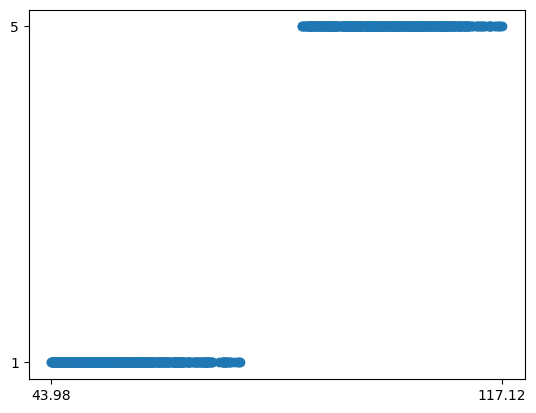

In [21]:

fig, ax = plt.subplots()

ax.scatter(x_train_intensidade, y_train, label='Intensidade')

ax.set_xticks([min(x_train_intensidade), max(x_train_intensidade)])
ax.set_yticks([1, 5])

plt.show()


In [22]:
x_train_intensidade_array = np.array(x_train_intensidade)
clf = LogisticRegression(random_state=0).fit(x_train_intensidade_array.reshape(-1, 1), y_train)

In [23]:
#coeficiente angular

print('coeficiente angular', clf.coef_)

#coeficiente linear

print('coeficiente linear', clf.intercept_)

coeficiente angular [[0.95283728]]
coeficiente linear [-75.42949571]


In [24]:
from scipy.special import expit

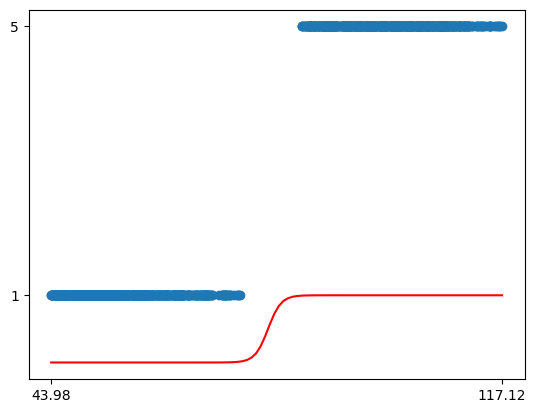

In [25]:
valores_x = np.linspace(x_train_intensidade_array.min(), x_train_intensidade_array.max(), 100)
valores_y = expit(valores_x * clf.coef_[0][0] + clf.intercept_[0])

fig, ax = plt.subplots()

ax.scatter(x_train_intensidade_array, y_train)
ax.plot(valores_x, valores_y, color='red')

ax.set_xticks([min(x_train_intensidade_array), max(x_train_intensidade_array)])
ax.set_yticks([1, 5])

plt.show()

#a função da sigmoide sempre retorna valores entre 0 e 1, por isso o plot ficou assim

In [26]:
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1179    5
1180    5
1181    5
1182    5
1183    5
Name: label, Length: 1184, dtype: int64

In [27]:
y_train_0x1 = y_train.replace({1: 0, 5: 1})

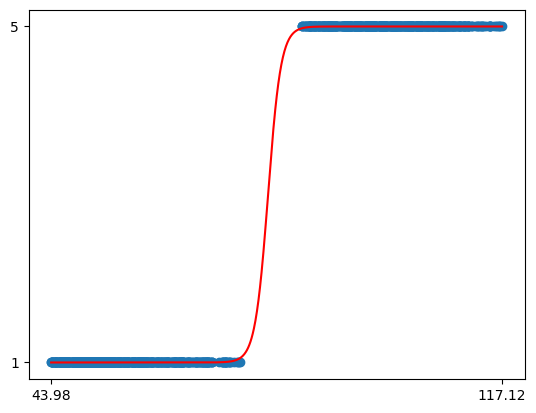

In [28]:
valores_x = np.linspace(x_train_intensidade_array.min(), x_train_intensidade_array.max(), 1184)
valores_y = expit(valores_x * clf.coef_[0][0] + clf.intercept_[0])

fig, ax = plt.subplots()

ax.scatter(x_train_intensidade, y_train_0x1)
ax.plot(valores_x, valores_y, color='red')

ax.set_xticks([min(x_train_intensidade), max(x_train_intensidade)])
ax.set_yticks([0, 1])
ax.set_yticklabels(['1', '5'])

plt.show()

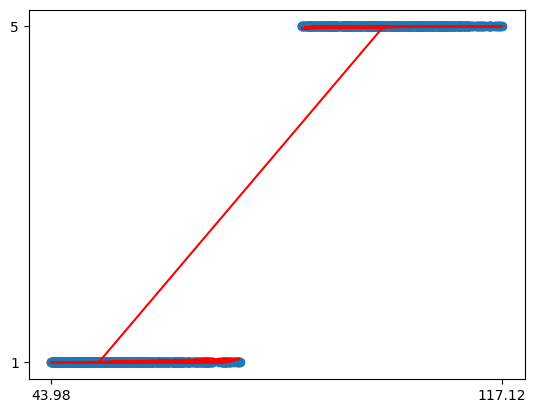

In [29]:
valores_y = expit(x_train_intensidade_array * clf.coef_[0][0] + clf.intercept_[0])

fig, ax = plt.subplots()

ax.scatter(x_train_intensidade_array, y_train_0x1)
ax.plot(x_train_intensidade_array, valores_y, color='red')

ax.set_xticks([min(x_train_intensidade_array), max(x_train_intensidade_array)])
ax.set_yticks([0, 1])
ax.set_yticklabels(['1', '5'])

plt.show()